# Depth_Estimation.ipynb
__Description:__ Notebook details how to answer questions for section 2.1.<br>
__Author:__ Matthew Lesko-Krleza<br>
__Course:__ ECSE 415<br>
__Assignment:__ Assignment #3

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_view1 = cv2.cvtColor(cv2.imread('./Aloe/view1.png'), cv2.COLOR_BGR2RGB)
img_view5 = cv2.cvtColor(cv2.imread('./Aloe/view5.png'), cv2.COLOR_BGR2RGB)

img_disp1 = cv2.cvtColor(cv2.imread('./Aloe/disp1.png'), cv2.COLOR_BGR2GRAY)
img_disp5 = cv2.cvtColor(cv2.imread('./Aloe/disp5.png'), cv2.COLOR_BGR2GRAY)

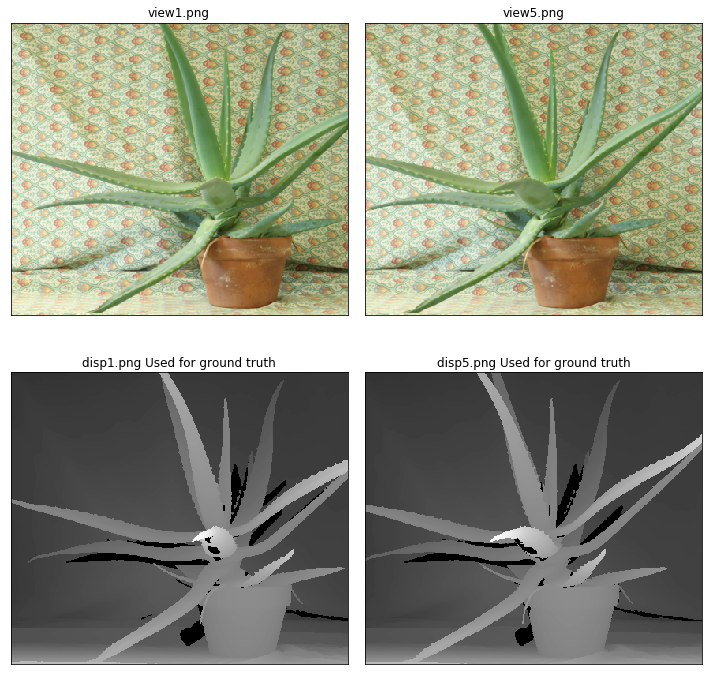

In [2]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img_view1)
plt.xticks([]), plt.yticks([]), plt.title('view1.png')
plt.subplot(222)
plt.imshow(img_view5)
plt.xticks([]), plt.yticks([]), plt.title('view5.png')
plt.subplot(223)
plt.imshow(img_disp1, "gray")
plt.xticks([]), plt.yticks([]), plt.title('disp1.png Used for ground truth')
plt.subplot(224)
plt.imshow(img_disp5, "gray")
plt.xticks([]), plt.yticks([]), plt.title('disp5.png Used for ground truth')
plt.tight_layout()
plt.show()

### Question 2 Stereo Vision

#### Question 2.1.1 Estimate depth from stereo image pair

In [3]:
def computeDepth(img_left, img_right, n_disparities=16, block_size=5):

    img_left_gray = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)
    img_right_gray = cv2.cvtColor(img_right, cv2.COLOR_RGB2GRAY)
    
    stereo = cv2.StereoBM_create(numDisparities=n_disparities, blockSize=block_size)
    return stereo.compute(img_left_gray, img_right_gray)

Compute disparties for combinations of blockSize elemOf [5,9,15] and numDisparities elemOf [16,32,48]

In [4]:
disp = []
for n_disparities in range(16, 49, 16):
    for block_size in [5,9,15]:
        disp.append(computeDepth(img_view1, img_view5, n_disparities=n_disparities, block_size=block_size))

Display all 9 depth maps

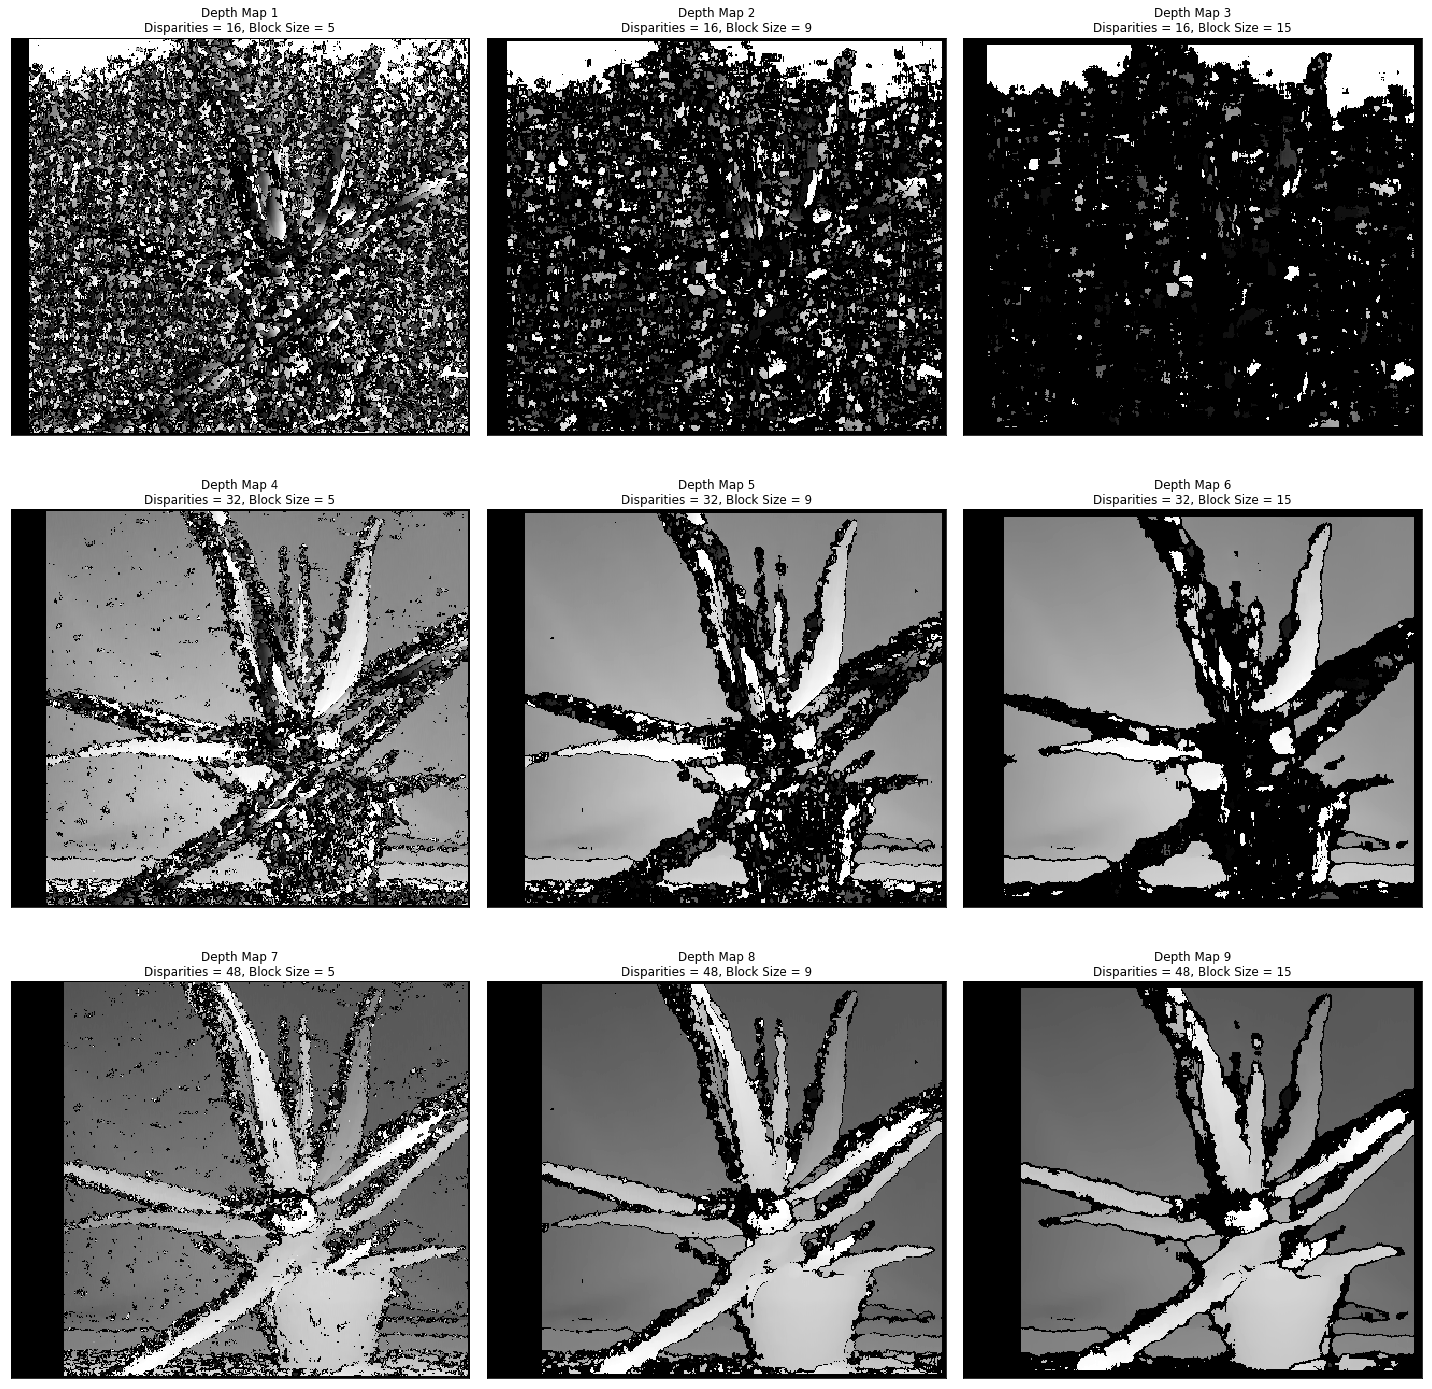

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.imshow(disp[0], cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title('Depth Map 1\nDisparities = 16, Block Size = 5')
plt.subplot(332)
plt.imshow(disp[1], cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title('Depth Map 2\nDisparities = 16, Block Size = 9')
plt.subplot(333)
plt.imshow(disp[2], cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title('Depth Map 3\nDisparities = 16, Block Size = 15')
plt.subplot(334)
plt.imshow(disp[3], cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title('Depth Map 4\nDisparities = 32, Block Size = 5')
plt.subplot(335)
plt.imshow(disp[4], cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title('Depth Map 5\nDisparities = 32, Block Size = 9')
plt.subplot(336)
plt.imshow(disp[5], cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title('Depth Map 6\nDisparities = 32, Block Size = 15')
plt.subplot(337)
plt.imshow(disp[6], cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title('Depth Map 7\nDisparities = 48, Block Size = 5')
plt.subplot(338)
plt.imshow(disp[7], cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title('Depth Map 8\nDisparities = 48, Block Size = 9')
plt.subplot(339)
plt.imshow(disp[8], cmap="gray")
plt.xticks([]), plt.yticks([]), plt.title('Depth Map 9\nDisparities = 48, Block Size = 15')
plt.tight_layout()
plt.show()

#### Question 2.1.2 Compute pixel-wise squared difference error with respect to ground-truth

In [10]:
def computeSSD(img1, img2):
    return np.uint64(np.sum((img1-img2)**2))

In [21]:
error = []
for i in range(9):
    error.append(computeSSD(disp[i], img_disp5))

print('Errors')
print(str.format('Depth Map (Number)\t\tValue(Intensity**2)'))
for i in range(9):
    print(str.format('{}\t\t\t\t{}\n', i + 1, error[i]))
    
print(str.format('Maximum Error: \nDepth Map #{}\tValue\t{}\n', np.argmax(error) + 1, np.max(error)))
print(str.format('Minimum Error: \nDepth Map #{}\tValue\t{}', np.argmin(error) + 1, np.min(error)))

Errors
Depth Map (Number)		Value(Intensity**2)
1				860566863

2				849850406

3				874032108

4				18446744073619807239

5				6053200

6				82809660

7				18446744073587368544

8				18446744073642640227

9				14712273

Maximum Error: 
Depth Map #8	Value	18446744073642640227

Minimum Error: 
Depth Map #5	Value	6053200


#### Question 2.1.3 Comment on the error-maps for each combination of parameters. Specifically, mention the effects of varying the parameters on the error in the region of high/low texture, edge, large/small depths.